In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

In [101]:
df = pd.read_csv('../Data/SP500-2.csv')
df.head()

,DATE,SP500_PCH
0,7/18/14,0.22191
1,7/25/14,0.42763
2,8/1/14,-1.36966
3,8/8/14,-1.57702
4,8/15/14,1.11251


In [103]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
#df = df.asfreq('W')

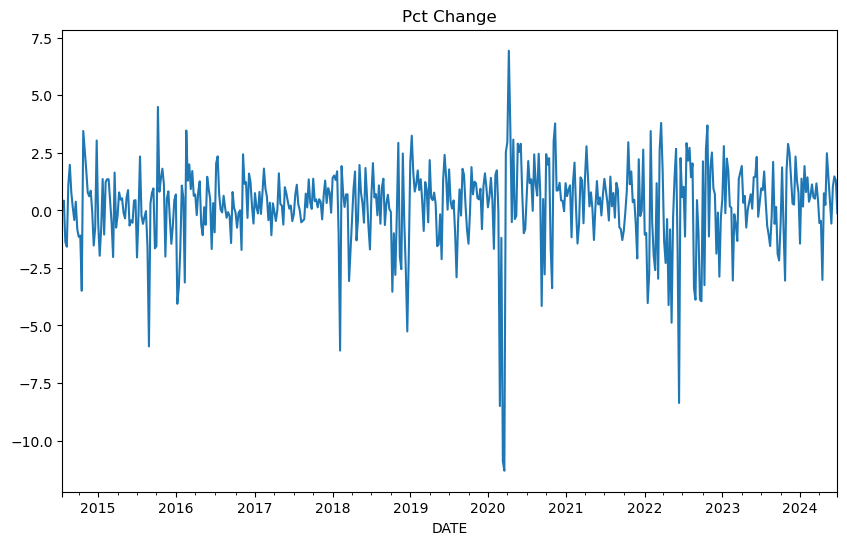

In [105]:
df['SP500_PCH'].plot(figsize=(10, 6))
plt.title('Pct Change')
plt.show()

In [113]:
#Fit a GARCH(1, 1) model
model = arch_model(df['SP500_PCH'], vol='Garch', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2244.698241265356
Iteration:      2,   Func. Count:     14,   Neg. LLF: 105663.68914616239
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1021.1478385955687
Iteration:      4,   Func. Count:     28,   Neg. LLF: 977.3024955444198
Iteration:      5,   Func. Count:     34,   Neg. LLF: 975.208928389233
Iteration:      6,   Func. Count:     40,   Neg. LLF: 975.2092384124192
Iteration:      7,   Func. Count:     46,   Neg. LLF: 975.1922505650402
Iteration:      8,   Func. Count:     50,   Neg. LLF: 975.1922505649857
Optimization terminated successfully    (Exit mode 0)
            Current function value: 975.1922505650402
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8


In [115]:
results.summary()
#mu: The series mean
#omega: The long-term average variance
#alpha: The impact of past squared returns (shocks) on current volatility
#beta: The impact of past volatility on current volatility

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              SP500_PCH   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -975.192
Distribution:                  Normal   AIC:                           1958.38
Method:            Maximum Likelihood   BIC:                           1975.40
                                        No. Observations:                  520
Date:                Fri, Jul 05 2024   Df Residuals:                      519
Time:                        11:44:11   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2849  7.246e-02      3.932  8.415e-05 [  0.143,  0.427]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2936      0.124      2.365  1.805e-02 [5.024e-02,  0.537]
alpha[1]       0.2566  7.765e-02      3.305  9.497e-04   [  0.104,  0.409]
beta[1]        0.6740  6.234e-02     10.812  3.024e-27   [  0.552,  0.796]
==========================================================================

Covariance estimator: robust
"""

In [119]:
#Forecasting variance
forecast = results.forecast(start=data.index[-10], horizon=5)
#help(forecast)

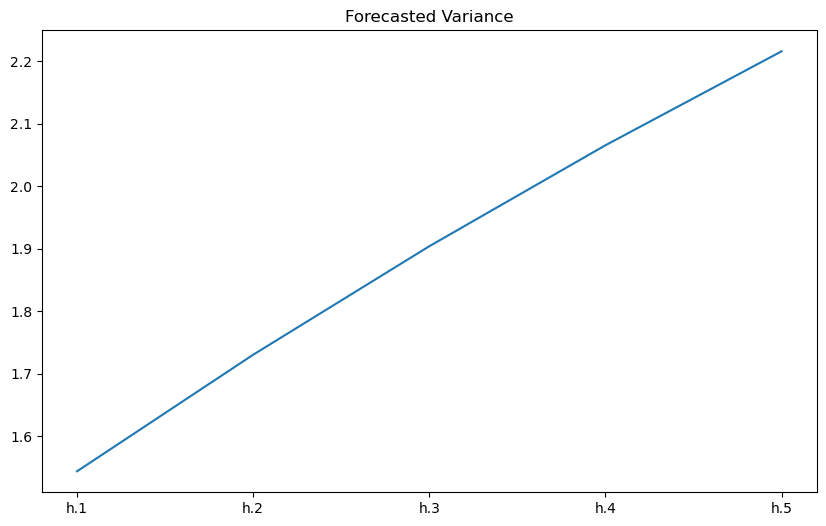

In [91]:
#Plotting forecasted variance
variance_forecast = forecast.variance.iloc[-1]
plt.figure(figsize=(10, 6))
plt.plot(variance_forecast)
plt.title('Forecasted Variance')
plt.show()

In [107]:
def fit_garch_models(data, max_p=5, max_q=5):
    best_aic = np.inf
    best_bic = np.inf
    best_order = None
    best_model = None
    
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            if p == 0 and q == 0:
                continue
            try:
                model = arch_model(data, vol='Garch', p=p, q=q)
                model_fit = model.fit(disp='off')
                aic = model_fit.aic
                bic = model_fit.bic
                if aic < best_aic:
                    best_aic = aic
                    best_bic = bic
                    best_order = (p, q)
                    best_model = model_fit
            except:
                continue
    
    return best_model, best_order, best_aic, best_bic

best_model, best_order, best_aic, best_bic = fit_garch_models(df['SP500_PCH'])

print(f"Best model order: {best_order}")
print(f"Best AIC: {best_aic}")
print(f"Best BIC: {best_bic}")
print(best_model.summary())

Best model order: (2, 1)
Best AIC: 1955.1114747591923
Best BIC: 1976.3806188170697
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              SP500_PCH   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -972.556
Distribution:                  Normal   AIC:                           1955.11
Method:            Maximum Likelihood   BIC:                           1976.38
                                        No. Observations:                  520
Date:                Fri, Jul 05 2024   Df Residuals:                      519
Time:                        11:40:03   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------

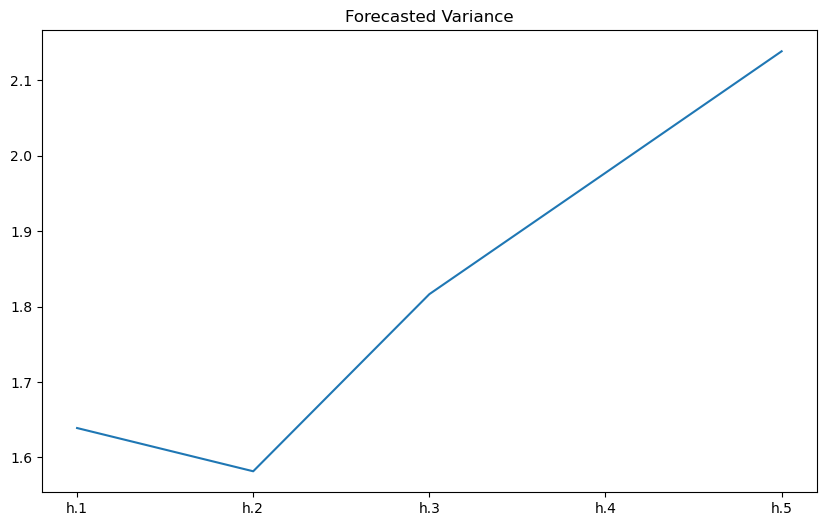

In [121]:
#Plotting forecasted variance from the "best model"
forecast = best_model.forecast(start=data.index[-10], horizon=5)
variance_forecast = forecast.variance.iloc[-1]
plt.figure(figsize=(10, 6))
plt.plot(variance_forecast)
plt.title('Forecasted Variance')
plt.show()

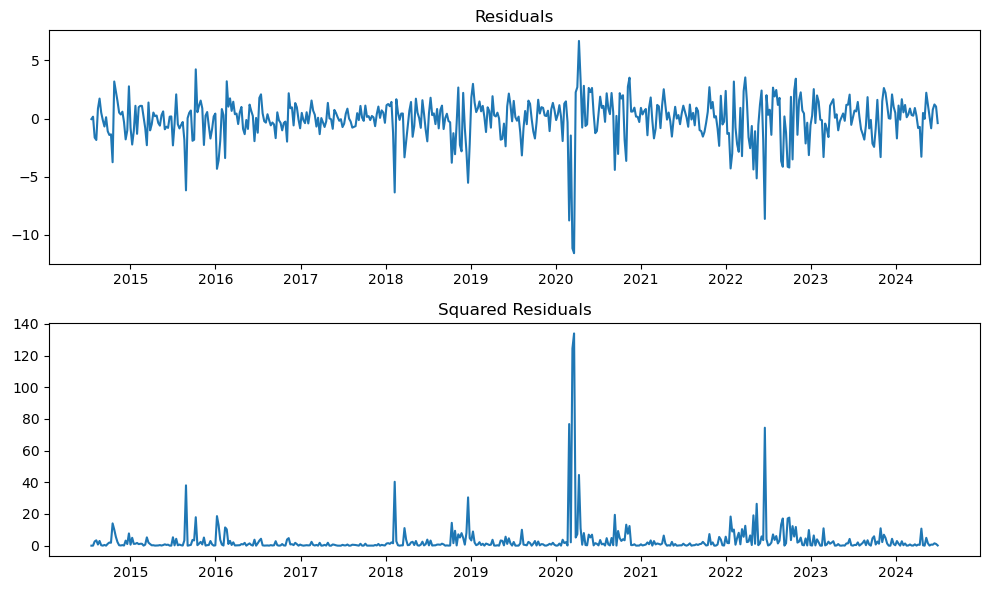

In [123]:
residuals = best_model.resid
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.plot(residuals**2)
plt.title('Squared Residuals')
plt.tight_layout()
plt.show()